In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'Data/walking_left_hand_1.csv'

pattern_import = pd.read_csv(filename)
pattern_import.head()

,time,x,y,z,gforce
0,0.007,-0.520,0.519,0.440,0.856
1,0.008,-0.419,0.524,0.548,0.866
2,0.008,-0.352,0.543,0.587,0.874
3,0.008,-0.338,0.570,0.621,0.909
4,0.010,-0.358,0.585,0.668,0.958


In [18]:
pattern = pattern_import[['time','gforce']].values

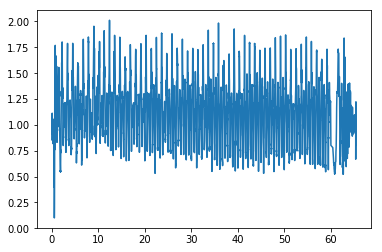

In [19]:
time = []
acceleration = []

for i in range(len(pattern)):
    time.append(pattern[i][0])
    acceleration.append(pattern[i][1])

fig = plt.plot(time,acceleration)
plt.show()

In [20]:
print(len(time))
def clerification(time,acceleration):
    export_data_time = []
    export_data_a = []
    for i in range(1,len(time)):
        if (time[i] == time[i-1]):
            pass
        else:
            export_data_time.append(time[i])
            export_data_a.append(acceleration[i])
    return([export_data_time, export_data_a])

[time,acceleration] = clerification(time,acceleration)
print(len(time))

26401
23984


In [21]:
def interp2(y1,y2,t1,t2,t):
    B = (y2-y1)/(t2-t1)
    C = -(t1*y2 - t2*y1)/(t2-t1)
    return( B*t + C)

def normalization(time, acceleration):
#function normalises the data-set (interpolates skipped itme-points)
#EXAMPLE: ns_data = normalization(s_data[0][3],s_data[1][3])
    
    #Define the minimal step by the time 
    dt = time[1] - time[0]    
    for i in range(1,len(time)):
        if(dt>time[i]-time[i-1]):
            dt = round(time[i] - time[i-1],4)

    export_t = [time[0]]           #list for the time sequences
    export_a  =[acceleration[0]]   #list for the acceleration sequences

    for i in range(1,len(time)):
        if(round(time[i]-export_t[-1],4)==dt):
            export_t.append(time[i])
            export_a.append(acceleration[i])
        else:
            while(round(time[i]-export_t[-1],4)>=dt):
                export_t.append (round(export_t[-1]+dt,4))
                export_a.append (interp2(acceleration[i-1],acceleration[i],time[i-1],time[i],export_t[-1]))
                
    return([export_t,export_a])

[time,acceleration] = normalization(time,acceleration)
print(len(time))

65448


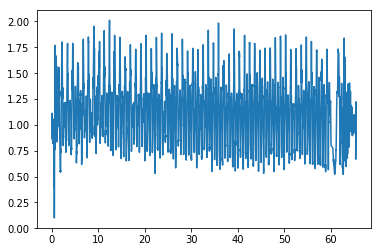

In [24]:
fig = plt.plot(time,acceleration)
plt.savefig("signal.svg")
plt.show()


In [7]:
from math import sqrt
def SimCos(x,y):
    a = 0.0
    b = 0.0
    c = 0.0
    if(len(x)==len(y)):
        for i in range(len(x)):
            a+=x[i]*y[i]
            b+=x[i]**2
            c+=y[i]**2
        try:
            sc = a/(sqrt(b)*sqrt(c))
        except(ValueError):
            sc=0
    else:
        sc = 0
    return(sc)

Definition of the length of the subsequence:

In [8]:
min_cs = 1e100
x = []
y = []
for i in range(10,10000):
    j=i
    cs=0
    k=0
    while(j<len(acceleration)-2*i):
        cs+=SimCos(acceleration[j:j+i],acceleration[j+i:j+2*i])
        j+=i
        k+=1
    x.append(i)
    y.append(cs/k)
    print(cs/k)

0.9998608408521439
0.9998367460648186
0.999816258190241
0.999811033435088
0.9997658631677511
0.9997609129136099
0.9997118488107662
0.9996938760759335
0.9996687230765511
0.9995830999089123
0.9995742237357393
0.9995005519634974
0.9994772836355997
0.9993826044929373
0.9993268229088325
0.9992829529450626
0.9992161218295555
0.9991682379420279
0.9991115973466567
0.9989520955606593
0.9989863778034412
0.9988740112985532
0.9988746330486713
0.9987253216117002
0.9986403523109476
0.9985520901131465
0.9984596757476129
0.99834625574855
0.9982892800211702
0.9981927966373852
0.9979936876564196
0.9981347841851274
0.9978153078356877
0.9976932973857097
0.9978191607945228
0.9975961290092834
0.9973584547714187
0.9974281974730537
0.9973309982003905
0.9972250259940258
0.9969452151937711
0.9968918455652435
0.996734426853884
0.9967789642050795
0.9968065006997225
0.9966615040551956
0.996022827312253
0.995978574425753
0.9961729995953201
0.9963464565853407
0.9961922582499639
0.9958808317716046
0.9951625991570743


0.9547527691686933
0.9565608188551573
0.9559606292270098
0.9558862598683577
0.9563996291223428
0.9557085329257126
0.9557334047336554
0.9574929247301125
0.9579042966446395
0.9567593807617305
0.9578365075707131
0.9590091082277082
0.9584182835023465
0.9592822153297681
0.961029553397967
0.9611438172035649
0.9602850311835598
0.9609700233417477
0.9615343881453073
0.9612591433486382
0.9618386244002483
0.9630259872755225
0.963414095143578
0.9631398609349026
0.9639719878715752
0.9644438752660648
0.9638422828506004
0.9645145736819039
0.9660245460584888
0.9657317845328552
0.9656653769129285
0.9661404446020244
0.9664333087507196
0.9658176117199785
0.966189506150058
0.967420647682951
0.9675584964815365
0.9667845529835143
0.9677267400066774
0.9691273490286582
0.9693592332200113
0.9690081790519368
0.9693987855894203
0.9702664517278479
0.9699774999274773
0.9704864849084314
0.970481048181011
0.9716317485626864
0.9711058902053152
0.9717019169924799
0.9723211612874331
0.9727598133687586
0.971775935968368

0.9063948866497351
0.9076167293959608
0.9086680808348593
0.9078916635424781
0.9074428118479492
0.9080045841092901
0.9078160126996675
0.9073968174995941
0.9063110654863585
0.9062215512576748
0.9068185853846548
0.9072361523454779
0.9080916947274604
0.9096276347570452
0.9107549927196052
0.9104180907465521
0.9107525700490328
0.9109695712518826
0.9109712057524698
0.9107074951547246
0.9105726871724834
0.9103355076454223
0.9101689046498063
0.9102739447110655
0.9105420462324791
0.9113357436052002
0.913227176921296
0.9136206871059462
0.9147468232140266
0.9146687149185647
0.9147314004111031
0.9152163652202905
0.9155330735760074
0.915358254637246
0.915075991404873
0.9151451329553043
0.9151487112372912
0.9151742107431726
0.9157470528857158
0.9166121247007035
0.9172430446112229
0.9192107497065025
0.9201116790749583
0.920090134037522
0.9203903921974651
0.9206612224241375
0.9207475066363484
0.920501138948301
0.9201279307008925
0.9200895797588344
0.9202480292559848
0.9203235802760604
0.920944523789447

0.9119189775058516
0.9116166362852725
0.9112956716664529
0.9110681747167692
0.9110500539592289
0.9112264903333825
0.9115150795097606
0.9120384539431095
0.9123243035299743
0.9123726261239461
0.9123702706595221
0.9122514953495101
0.9117536971142323
0.9109565109028043
0.9098020349720757
0.9087195499126207
0.9066529828329777
0.9062515594578215
0.9059447688032473
0.9053691379245801
0.9046752070293358
0.9041291514243548
0.9036988749627619
0.9034328522352287
0.9032575687626961
0.9031279731177237
0.9030459660011655
0.9030092856508459
0.9028833420062681
0.902851029146155
0.9028042205130619
0.9026451438401039
0.9024382906101439
0.9023612709190124
0.902432859294007
0.9026230255858844
0.9029583777361808
0.9035065899687267
0.9040516803511217
0.9042941336421483
0.9042263941783321
0.9040105650957924
0.9036107306722281
0.903106242119243
0.9006904793342596
0.9001145109898091
0.8995619651156262
0.8991675463593923
0.8985718842473431
0.8979779732111148
0.8977321086942387
0.8975173617083374
0.8973275306677

KeyboardInterrupt: 

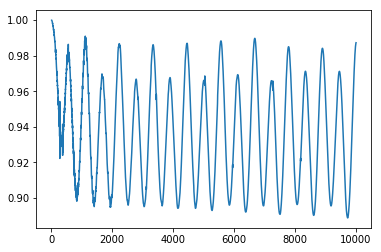

In [31]:
plt.plot(x,y)
plt.show()

In [9]:
x_max = []
for i in range(1,len(y)-1):
    if(((y[i-1]<y[i])&(y[i+1]<y[i]))&(y[i]>0.98)):
        x_max.append(x[i])

In [10]:
print(x_max)

[30, 32, 41, 44, 47, 54, 59, 63, 66, 75, 83, 85, 89, 94, 96, 100, 103, 109, 111, 114, 119, 126, 128, 131, 133, 137, 140, 142, 145, 147, 523, 528, 532, 536, 541, 546, 551, 556, 569, 572, 577, 1074, 1093, 1113, 1133, 1143, 1154]


In [11]:
x1 = []
y1 = []
for i in range(2000,2500):
    j=i
    cs=0
    k=0
    while(j<len(acceleration)-2*i):
        cs+=SimCos(acceleration[j:j+i],acceleration[j+i:j+2*i])
        j+=i
        k+=1
    x1.append(i)
    y1.append(cs/k)
    print(cs/k)

x2 = []
y2 = []
for i in range(1000,1200):
    j=i
    cs=0
    k=0
    while(j<len(acceleration)-2*i):
        cs+=SimCos(acceleration[j:j+i],acceleration[j+i:j+2*i])
        j+=i
        k+=1
    x2.append(i)
    y2.append(cs/k)
    print(cs/k)

0.9032797474213301
0.9034416468058789
0.9036096570066717
0.9038197677211083
0.9040920614631174
0.9044228636388549
0.9047860598909625
0.9051659838754592
0.9055453052977158
0.9059140869679883
0.9062510307303543
0.9065861597621416
0.9069627139827433
0.9073667202279746
0.9077662206496246
0.9081589852801891
0.9085145971190675
0.9088501899256494
0.9091848369884791
0.9094850838200548
0.909822904232006
0.9101846537066536
0.910582813110403
0.9109799656927077
0.9113937945884506
0.9118186814522382
0.9122141666066298
0.9126050486224131
0.9129984595466853
0.9134679883119323
0.9139267975710414
0.9143466852538001
0.9147763198219544
0.9152534488732691
0.9157720574296551
0.9163643365525942
0.9169562422518517
0.9175432502163121
0.9180779859377544
0.9185933780357696
0.919091162130835
0.91969681395394
0.9203244338880936
0.9208701718855259
0.9213987950314133
0.9217932777535017
0.9212814592309015
0.92172396109911
0.9220804288396866
0.9223839029928008
0.9225434715519799
0.9226923149812537
0.9227869006047986


KeyboardInterrupt: 

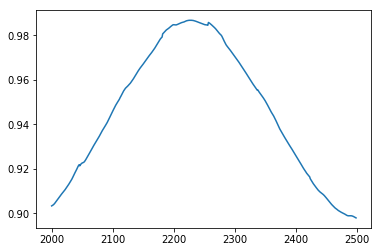

In [37]:
plt.plot(x1,y1)
plt.show()

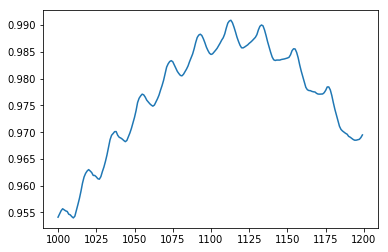

In [38]:
plt.plot(x2,y2)
plt.show()

The length of the analysed subsequence 1113 elements

In [12]:
n = 2228

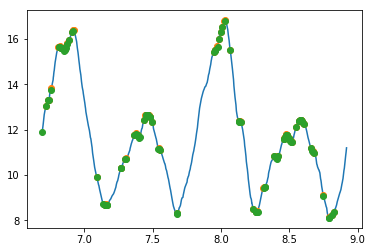

103
104


In [13]:
local_max_time = []
local_max_acc = []
local_max_i = []
local_min_time = []
local_min_acc = []
local_min_i = []

x = []
y = []
k=3
for i in range(k*n,(k+1)*n):
    x.append(time[i])
    y.append(acceleration[i])
for k in range(4,13):
    j = 0
    for i in range(k*n,(k+1)*n):
        y[j]+=acceleration[i]
        j+=1
for i in range(len(x)):
    acceleration[i]/=11

switch = False
    
for i in range(len(x)-1):
    if( i ==0 ):
        if((y[0]>y[1])):
            local_max_time.append(x[i])
            local_max_acc.append(y[i])
            local_max_i.append(i)
        else:
            local_min_time.append(x[i])
            local_min_acc.append(y[i])
            local_min_i.append(i)
    else:
        if((y[i-1]<y[i])&(y[i+1]<y[i])&(not switch)):
            local_max_time.append(x[i])
            local_max_acc.append(y[i])
            local_max_i.append(i)
            switch = True
        elif((y[i-1]>y[i])&(y[i+1]>y[i])&(switch)):
            local_min_time.append(x[i])
            local_min_acc.append(y[i])
            local_min_i.append(i)
            switch = False

plt.plot(x,y)
plt.plot(local_max_time, local_max_acc, 'o')
plt.plot(local_min_time, local_min_acc, 'o')
plt.show()

print(len(local_max_time))
print(len(local_min_time))

1916 1966
1341 1375
790 800
231 400


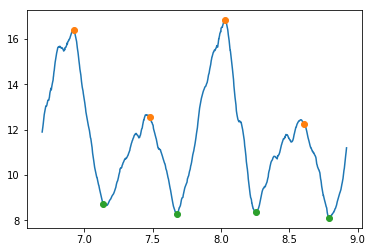

[1916, 1341, 790, 231]
[1561, 984, 448, 2098]


In [14]:
threshold = 0.15

final_min_time = []
final_min_acc = []
final_max_time = []
final_max_acc = []
i_on = []
i_off = []

i=0

while( i < len(local_min_time)):
    try:
        if (local_max_acc[i]-local_min_acc[i+1]>threshold):
            final_max_time.append(local_max_time[i])
            final_max_acc.append(local_max_acc[i])
            i_on.append(local_max_i[i])
            final_min_acc.append(local_min_acc[i+1])
            final_min_time.append(local_min_time[i+1])
            i_off.append(local_min_i[i+1])
    except:
        pass
    i+=1

ftmax = []
famax = []
ftmin = []
famin = []
ion = []
ioff= []
    
i = len(final_max_time)-1
while( i >= 0):
    try:
        if (final_max_acc[i]-final_min_acc[i-1] > threshold):
            ftmax.append(final_max_time[i])
            famax.append(final_max_acc[i])
            print(i_on[i],i_off[i])
            ion.append(i_on[i])
            ftmin.append(final_min_time[i-1])
            famin.append(final_min_acc[i-1])
            ioff.append(i_off[i-1])
    except:
        pass
    i-=1
plt.plot(x,y)    
plt.plot(ftmax, famax, 'o')
plt.plot(ftmin, famin, 'o')
plt.show()
print(ion)
print(ioff)

In [15]:
i=3*n
p = []

while(i<len(time)):
    try:
        power = 0
        for j in range(len(ion)):
            power+=(acceleration[i+ion[j]]-acceleration[i+ioff[j]])
        p.append(power)
        i+=n
    except:
        break

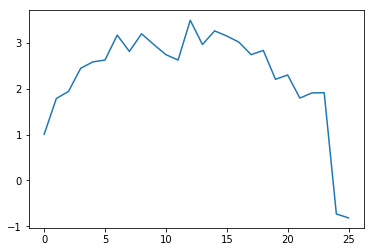

In [16]:
plt.plot(p)
plt.savefig("output.svg")